In [24]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
file_name = 'Bo32_OpenAssistant_pythia-12b-sft-v8-2.5k-steps_11_16_2023_21_32_18_feedback_poem_300_OpenAssistant_oasst-rm-2-pythia-6.9b-epoch-1_comparison_11_17_2023_15_33_47.csv'
file_path = os.path.join('results', file_name)
df = pd.read_csv(file_path)

In [26]:
#get all the unique values of the column "type"
types = df['type'].unique()

preffered_1 = [col for col in df.columns if 'preferred_1' in col]
preffered_2 = [col for col in df.columns if 'preferred_2' in col]

for BoN_pref_1, BoN_pref_2 in zip(preffered_1, preffered_2):
    print('\nN samples: '+BoN_pref_1[:5])
    for type in types: 
        if type == 'base':
            continue

        #compute the percentage of time when the column 'prefered_1' and prefered_2' have different values
        df_type = df[df['type'] == type]
        df_type_diff = df_type[df_type[BoN_pref_1] != df_type[BoN_pref_2]]
        print('     Percentage of time GPT4 disagrees when swapping for type \'{}\': {}%'.format(type, len(df_type_diff)/len(df_type)*100))


N samples: BoN_1
     Percentage of time GPT4 disagrees when swapping for type 'like': 18.333333333333332%
     Percentage of time GPT4 disagrees when swapping for type 'dislike': 5.0%

N samples: BoN_2
     Percentage of time GPT4 disagrees when swapping for type 'like': 20.0%
     Percentage of time GPT4 disagrees when swapping for type 'dislike': 6.666666666666667%

N samples: BoN_4
     Percentage of time GPT4 disagrees when swapping for type 'like': 18.333333333333332%
     Percentage of time GPT4 disagrees when swapping for type 'dislike': 15.0%

N samples: BoN_8
     Percentage of time GPT4 disagrees when swapping for type 'like': 28.333333333333332%
     Percentage of time GPT4 disagrees when swapping for type 'dislike': 11.666666666666666%

N samples: BoN_1
     Percentage of time GPT4 disagrees when swapping for type 'like': 25.0%
     Percentage of time GPT4 disagrees when swapping for type 'dislike': 18.333333333333332%

N samples: BoN_3
     Percentage of time GPT4 disagr

/tmp/ipykernel_1514915/593279004.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df_long, x='samples', y='positivity', hue='type', ci=95)
/tmp/ipykernel_1514915/593279004.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in vals])


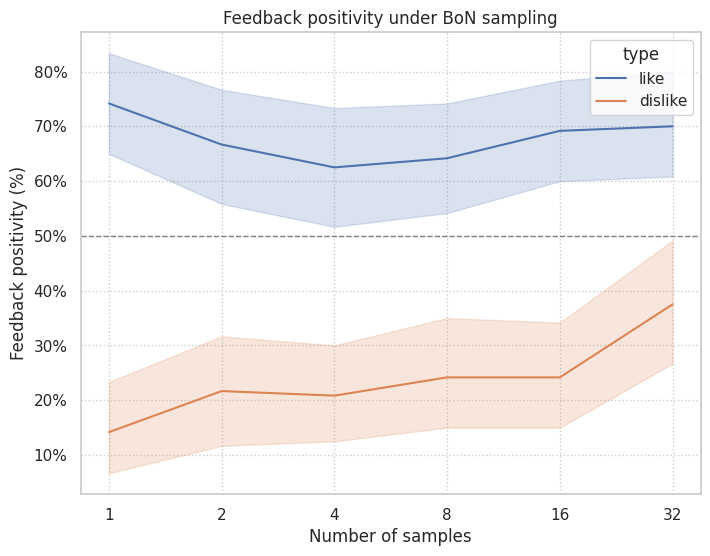

In [56]:
preferred_columns = []

for BoN_pref_1, BoN_pref_2 in zip(preffered_1, preffered_2):

    preferred = BoN_pref_1[:-2]
    preferred_columns.append(preferred)

    df[preferred] = df[[BoN_pref_1, BoN_pref_2]].mean(axis=1)

df_long = pd.melt(df[df['type'] != 'base'], id_vars=['type'], value_vars=preferred_columns, var_name='samples', value_name='positivity')

df_long.tail()

# set the theme to discrete grid to have a better visualization
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {
    'grid.linestyle': ':'  # Use a dot line style for the grid
})

plt.figure(figsize=(8, 6))

# Seaborn's lineplot function will calculate and plot the confidence interval by default
sns.lineplot(data=df_long, x='samples', y='positivity', hue='type', ci=95)

#set title 
plt.title('Feedback positivity under BoN sampling')
plt.xlabel('Number of samples')
plt.ylabel('Feedback positivity (%)')

#change the y-axis to percentage
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# Add a dotted line at y=0.5
plt.axhline(y=0.5, color='gray', linewidth=1, linestyle='--')

#set the x axis value to 1,2,4,8,16,32
plt.xticks(range(len(like_positivity)), [1,2,4,8,16,32])

# Save the plot
plot_file_name = file_name.replace('.csv', '.png')
plot_file_path = os.path.join('results', plot_file_name)
plt.savefig(plot_file_path)

plt.show()